<a href="https://colab.research.google.com/github/Srinivas1258/ML-DL/blob/master/ML/pet_adoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset

In [ ]:
l=[1,2,3,4,5]
b=[2,4,6,8]
ouput=[i**j for i in l for j in b if i%j==0]
print(ouput)

[4, 16, 256]


In [ ]:
from google.colab import files
f=files.upload()

Saving pet_data.zip to pet_data.zip


In [ ]:
!pip3 install xgboost

In [ ]:
!unzip pet_data.zip

Archive:  pet_data.zip
   creating: Dataset/
  inflating: Dataset/train.csv       
  inflating: Dataset/test.csv        


Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train=pd.read_csv('Dataset/train.csv')
test=pd.read_csv('Dataset/test.csv')
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
train.shape

(18834, 11)

In [ ]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [ ]:
train.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [ ]:

train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

**Handling missing values in data**

In [ ]:
pd.set_option('max_rows',None) # for viewing all values in pandas dataframe
train['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

Now i came to conclusion that i have to use to ffill or bfill to handle missing values or we can use knn imputer class

In [ ]:
from sklearn.impute import KNNImputer
train['condition']=train['condition'].astype('float64')
train=train.drop(columns=['pet_id','issue_date','listing_date'],axis=1)
enc=LabelEncoder()
train['color_type']=enc.fit_transform(train['color_type'])

imp=KNNImputer(n_neighbors=3)
train=imp.fit_transform(train)
train=pd.DataFrame(train)
train.columns=['condition','color_type','length(m)','height(cm)','X1','X2','breed_category','pet_category']
train['condition']=[ 0 if i<0.5 else 1 if i>0.5 and i<1.5 else 2 for i in train['condition']]
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2,18.0,0.80,7.78,13.0,9.0,0.0,1.0
1,1,53.0,0.72,14.19,13.0,9.0,0.0,2.0
2,1,15.0,0.15,40.90,15.0,4.0,2.0,4.0
3,1,53.0,0.62,17.82,0.0,1.0,0.0,2.0
4,2,2.0,0.50,11.06,18.0,4.0,0.0,1.0


In [ ]:
test['condition']=test['condition'].astype('float64')
test=test.drop(columns=['pet_id','issue_date','listing_date'],axis=1)
enc=LabelEncoder()
test['color_type']=enc.fit_transform(test['color_type'])

test['condition']=[ 0 if i<0.5 else 1 if i>0.5 and i<1.5 else 2 for i in test['condition']]
# test.head()
test=imp.fit_transform(test)
test=pd.DataFrame(test)
test.columns=['condition','color_type','length(m)','height(cm)','X1','X2']
test.head()


,condition,color_type,length(m),height(cm),X1,X2
0,0.0,2.0,0.87,42.73,0.0,7.0
1,1.0,36.0,0.06,6.71,0.0,1.0
2,1.0,2.0,0.24,41.21,0.0,7.0
3,1.0,2.0,0.29,8.46,7.0,1.0
4,1.0,14.0,0.71,30.92,0.0,7.0


In [ ]:
# 
# test['condition']=[ 0 if i<0.5 else 1 if i>0.5 and i<1.5 else 2 for i in test['condition']]


Data cleaning - droping pet_id ,issue_date,listing_date

**Feature Engineering**

# Its time for encoding the categorical values in data 

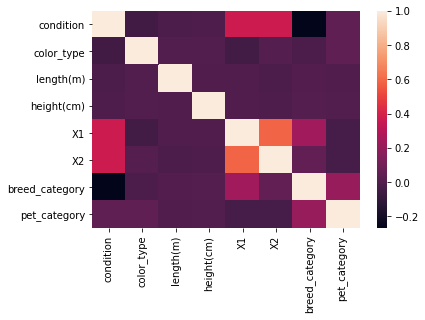

In [ ]:
corr=train.corr()
sns.heatmap(corr)

Scaling the data is mandatory step before applying ML

In [ ]:
X=train.iloc[:,0:6]
y1=train.iloc[:,6:7]
y2=train.iloc[:,6:7]
y=train.iloc[:,6:]
y.head()


,breed_category,pet_category
0,0.0,1.0
1,0.0,2.0
2,2.0,4.0
3,0.0,2.0
4,0.0,1.0


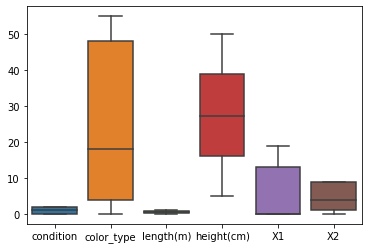

In [ ]:
sns.boxplot(data=train.iloc[:,0:6])

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled)
X.columns=['condition','color_type','length(m)','height(cm)','X1','X2']
# X.head()
test_scaled=scaler.fit_transform(test)
test=pd.DataFrame(test_scaled)
test.columns=['condition','color_type','length(m)','height(cm)','X1','X2']
test.head()

,condition,color_type,length(m),height(cm),X1,X2
0,-1.218357,-1.141113,1.252553,1.182838,-0.807684,0.708040
1,0.035094,0.686693,-1.544439,-1.605713,-0.807684,-0.994885
2,0.035094,-1.141113,-0.922885,1.065164,-0.807684,0.708040
3,0.035094,-1.141113,-0.750231,-1.470234,0.268339,-0.994885
4,0.035094,-0.496005,0.700061,0.268546,-0.807684,0.708040


In [ ]:
X.head()

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,18.0,0.80,7.78,13.0,9.0
1,1.0,53.0,0.72,14.19,13.0,9.0
2,2.0,15.0,0.15,40.90,15.0,4.0
3,1.0,53.0,0.62,17.82,0.0,1.0
4,2.0,2.0,0.50,11.06,18.0,4.0


In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.multioutput import MultiOutputClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)\n\nknn = KNeighborsClassifier(n_neighbors=3)\nclassifier = MultiOutputClassifier(knn, n_jobs=-1)\nclassifier.fit(X_train,y_train)\nclassifier.score(X_test,y_test)'

Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning.
Lazy predict will only work for single output variable


```
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models
```





breed_category - y1-clf1

In [ ]:
'''
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
clf1=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train1, X_test1, y_train1, y_test1)
models'''

'\nfrom sklearn.model_selection import train_test_split\nfrom lazypredict.Supervised import LazyClassifier\nclf1=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)\nmodels,predictions = clf.fit(X_train1, X_test1, y_train1, y_test1)\nmodels'

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y1,test_size=0.1,random_state=42,stratify=y1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,n_estimators=300)
rf.fit(X_train1,y_train1)
rf.score(X_test1,y_test1)


0.851380042462845

In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier()
# clf.fit(X_train1,y_train1)
# clf.score(X_test1,y_test1)
clf.fit(X_train2,y_train2)
clf.score(X_test2,y_test2)

0.8560203864939477

Now we have to do some Hyperparameter tuning to increase the accuaracy of model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x)for x in np.linspace(start=100,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# creating Random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}

In [ ]:
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf1=RandomForestClassifier()
rf_Random=RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_Random.fit(X_train1,y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 40.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_Random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 311}

In [ ]:
'''best_param=rf_Random.best_estimator_
best_param.fit(X_train1,y_train1)
best_param.score(X_test1,y_test1)'''

'best_param=rf_Random.best_estimator_\nbest_param.fit(X_train1,y_train1)\nbest_param.score(X_test1,y_test1)'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,n_estimators=300)
rf2.fit(X_train1,y_train1)
rf2.score(X_test1,y_test1)

0.8566574644298153

In [ ]:
breed_pred=clf.predict(test)

pet_category - y2 - clf2

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y2,test_size=0.25,random_state=42,stratify=y2)
rf.fit(X_train2,y_train2)
rf.score(X_test2,y_test2)

0.8583563389254619

In [ ]:
pet_pred=clf.predict(test)

In [ ]:
sub=pd.read_csv('Dataset/test.csv')
sub=sub.iloc[:,:1]
sub.head()

,pet_id
0,ANSL_75005
1,ANSL_76663
2,ANSL_58259
3,ANSL_67171
4,ANSL_72871


In [ ]:
sub['breed_category']=pd.Series(breed_pred,index=sub.index)
sub.head()

,pet_id,breed_category
0,ANSL_75005,1.0
1,ANSL_76663,1.0
2,ANSL_58259,1.0
3,ANSL_67171,1.0
4,ANSL_72871,1.0


In [ ]:
sub['pet_category']=pd.Series(pet_pred,index=sub.index)
# sub.head()
sub.reset_index(drop=True,inplace=True)
sub.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,1.0
1,ANSL_76663,1.0,1.0
2,ANSL_58259,1.0,1.0
3,ANSL_67171,1.0,1.0
4,ANSL_72871,1.0,1.0


In [ ]:
sub.to_csv('pet_sub.csv',index=False)

In [ ]:
files.download('pet_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>